## Assignment : Boom Bikes Demand Prediction Assignment 

Submitted By:  Harjaspreet Singh 

Batch: ML- C43

Institute: Post Graduate Diploma in Machine Learning and AI - IIIT, Bangalore

The solution is divided into the following sections: 
- Data understanding and exploration
- Data Visualisation 
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import scipy as sp

import statsmodels.api as sm
import statsmodels.tsa.api as smt
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import scipy as sp

import statsmodels.api as sm
import statsmodels.tsa.api as smt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
df = pd.read_csv('day.csv')

In [4]:
# Let's take a look at the first few rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Let's look at the number of rows and columns in the dataset
df.shape

(730, 16)

Observation: The dataset has 730 rows and 16 variables 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Observation : All columns have data in all 730 rows. Hence, there are no missing values in this dataset

In [7]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
# Getting insights of the numerical features
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning 

#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

In [9]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.

# 1=spring
df.loc[(df['season'] == 1) , 'season'] = 'spring'

# 2=summer
df.loc[(df['season'] == 2) , 'season'] = 'summer'

# 3=fall
df.loc[(df['season'] == 3) , 'season'] = 'fall'

# 4=winter
df.loc[(df['season'] == 4) , 'season'] = 'winter'

In [11]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
df['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
# year (0: 2018, 1:2019)
df['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [13]:
# Assigning string values to different months instead of numeric values which may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns
df[['mnth']] = df[['mnth']].apply(object_map)

In [14]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
df['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [15]:
# whether day is a holiday or not (0: No, 1: Yes)
df['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [16]:
# Assigning string values to weekdays instead of numeric values. These values may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the two columns
df[['weekday']] = df[['weekday']].apply(str_map)

In [17]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
df['weekday'].astype('category').value_counts()

Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: weekday, dtype: int64

In [18]:
# Assigning string values to weathersit instead of numeric values. These values may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def str_map(x):
    return x.map({1: 'Clear', 2: 'Mist', 3: 'Light_Rain', 4: 'Heavy_Rain'})

# Applying the function to the two columns
df[['weathersit']] = df[['weathersit']].apply(str_map)

In [19]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
df['weathersit'].astype('category').value_counts()

Clear         463
Mist          246
Light_Rain     21
Name: weathersit, dtype: int64

In [20]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
df['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

Observation : There are no duplicate rows in this dataset

In [21]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Dropping Columns - instant, dteday, casual, registered as they are not adding any value to the model

In [22]:
df.drop(["instant","dteday", "casual", "registered"], axis = 1, inplace = True)

In [23]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### 2. Data Visualisation

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

### Univariate Analysis - Numerical Variables

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


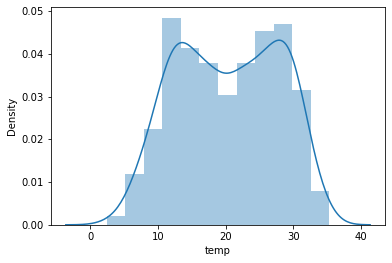

In [25]:
# temperature
sns.distplot(df['temp'])
plt.show()

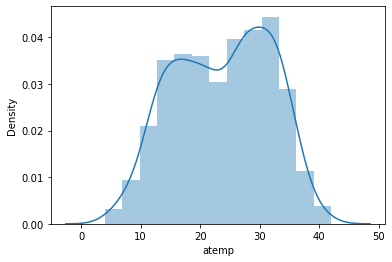

In [26]:
# feeling temperature
sns.distplot(df['atemp'])
plt.show()

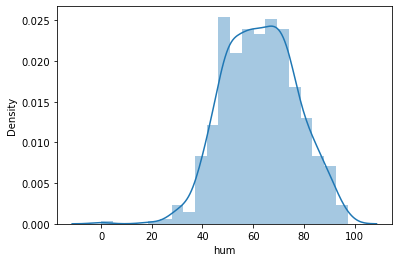

In [27]:
# humidity
sns.distplot(df['hum'])
plt.show()

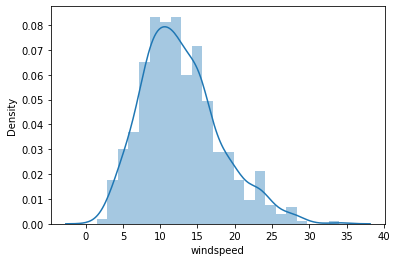

In [28]:
# wind speed
sns.distplot(df['windspeed'])
plt.show()

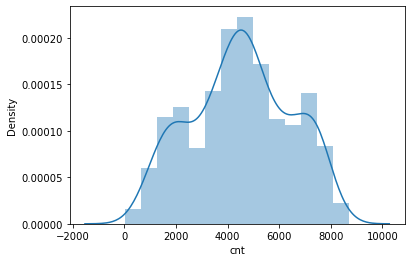

In [29]:
# Target variable: count of total Bikes both casual and registered
sns.distplot(df['cnt'])
plt.show()

In [30]:
# All categorical variables in the dataset
categorical_df=df.select_dtypes(exclude=['float64','datetime64','int64'])
print(categorical_df.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

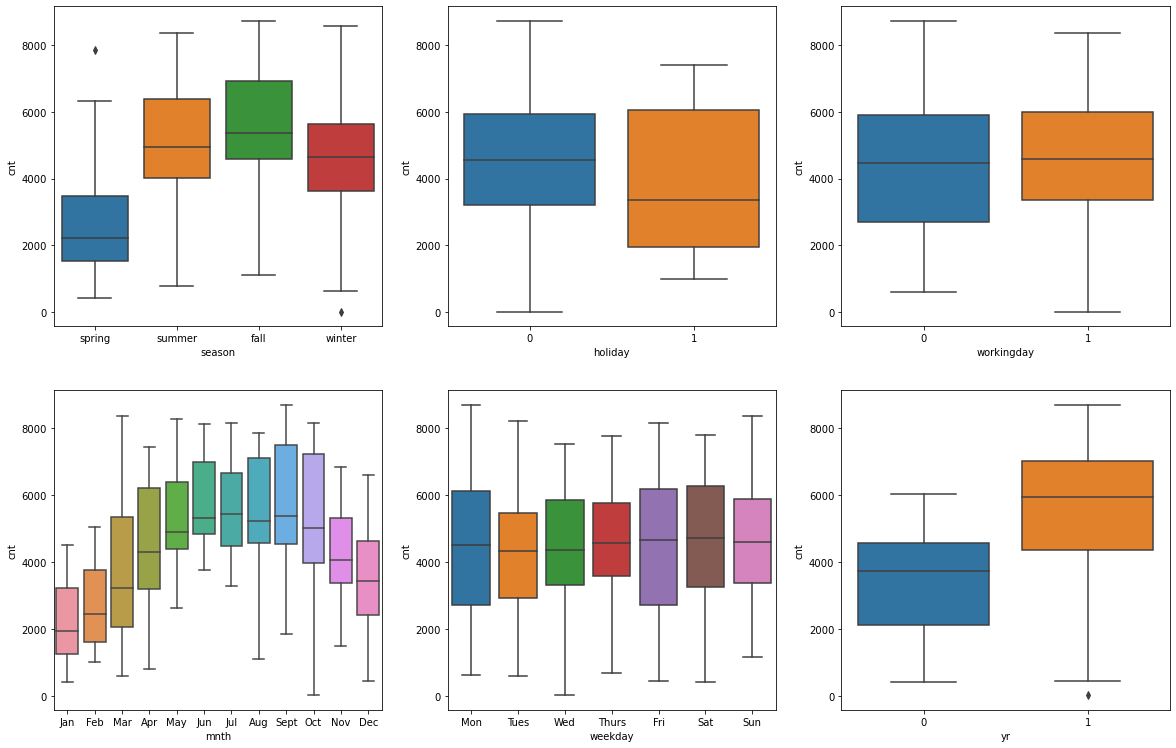

In [31]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [32]:
# Converting "casual","registered" and "cnt" numeric variables to float. 
# This step is performed to seperate out categorical variables like 'yr','holiday','workingday' which have binary values in them
IntVariableList = ["cnt"]

for var in IntVariableList:
    df[var] = df[var].astype("float")

In [33]:
# All numeric variables in the dataset
numeric_df = df.select_dtypes(include=['float64'])
numeric_df.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985.0
1,14.902598,17.68695,69.6087,16.652113,801.0
2,8.050924,9.47025,43.7273,16.636703,1349.0
3,8.200000,10.60610,59.0435,10.739832,1562.0
4,9.305237,11.46350,43.6957,12.522300,1600.0


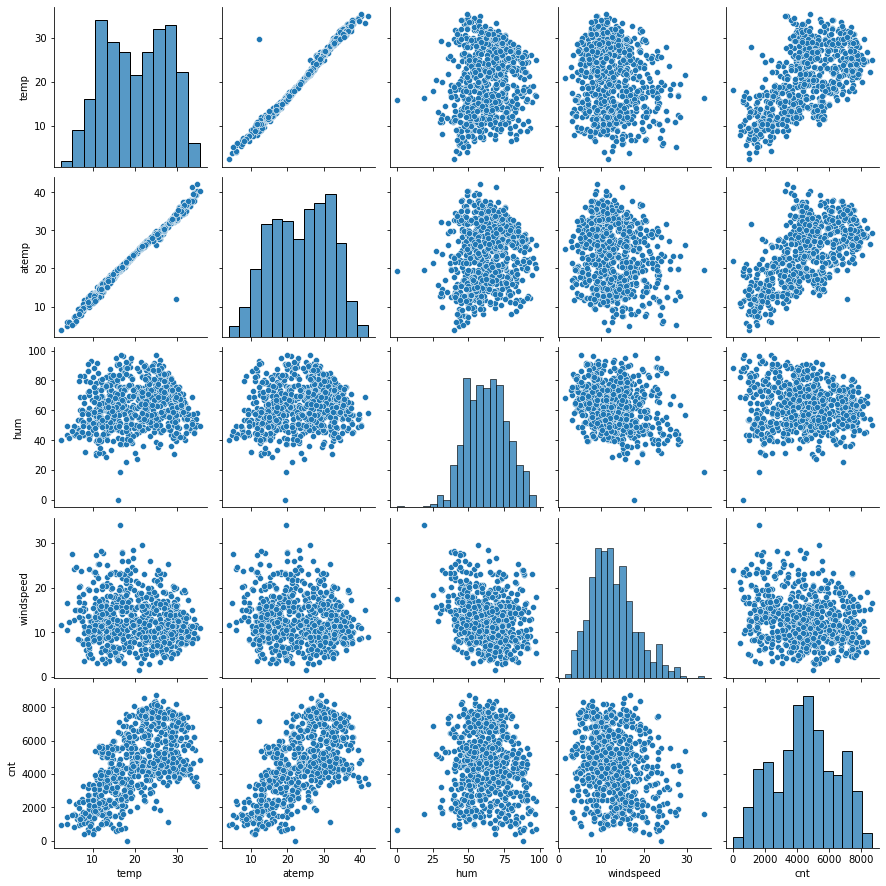

In [34]:
# Pairwise scatter plot
sns.pairplot(numeric_df)
plt.show()

We can better plot correlation matrix between variables to know the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [35]:
# Correlation matrix
cor = numeric_df.corr()
cor

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


Let's plot the correlations on a heatmap for better visualisation

<AxesSubplot:>

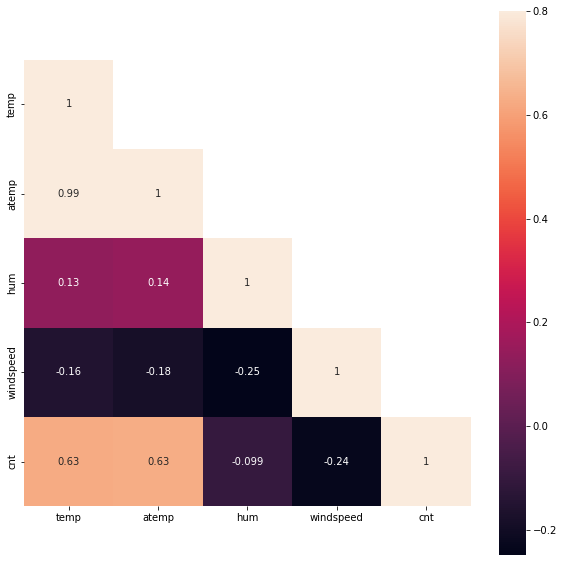

In [36]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

In [37]:
#removing atemp as it is highly correlated with temp
df.drop('atemp',axis=1,inplace=True)    

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

In [38]:
# Subset all categorical variables
categorical_df=df.select_dtypes(include=['object'])

In [39]:
categorical_df.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,Mist
1,spring,Jan,Tues,Mist
2,spring,Jan,Wed,Clear
3,spring,Jan,Thurs,Clear
4,spring,Jan,Fri,Clear


#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers. 

For this, we will use something called `dummy variables`.

In [40]:
# Convert into dummies
df_dummies = pd.get_dummies(categorical_df, drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Drop categorical variable columns
df = df.drop(list(categorical_df.columns), axis=1)

In [42]:
# Concatenate dummy variables with the original dataframe
df = pd.concat([df, df_dummies], axis=1)

In [43]:
# Let's check the first few rows
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    float64
 7   season_spring          730 non-null    uint8  
 8   season_summer          730 non-null    uint8  
 9   season_winter          730 non-null    uint8  
 10  mnth_Aug               730 non-null    uint8  
 11  mnth_Dec               730 non-null    uint8  
 12  mnth_Feb               730 non-null    uint8  
 13  mnth_Jan               730 non-null    uint8  
 14  mnth_Jul               730 non-null    uint8  
 15  mnth_J

## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [45]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [46]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
653,1,0,1,19.201653,55.8333,12.208807,7534.0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220.0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,6664.0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
578,1,0,1,30.852500,65.9583,8.666718,7261.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,10.591653,56.0833,16.292189,2739.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

Let's scale all these columns using MinMaxScaler. You can use any other scaling method as well; it is totally up to you.

In [47]:
from sklearn.preprocessing import MinMaxScaler 

In [48]:
scaler = MinMaxScaler()

In [49]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [50]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.764151,0,1,0,...,0,0,0,0,0,0,0,1,0,1
578,1,0,1,0.863973,0.679690,0.187140,0.832835,0,0,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.218017,1,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0.312586,0,0,1,...,0,0,1,0,0,0,0,0,0,1


As expected, the variables have been appropriately scaled.

In [51]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


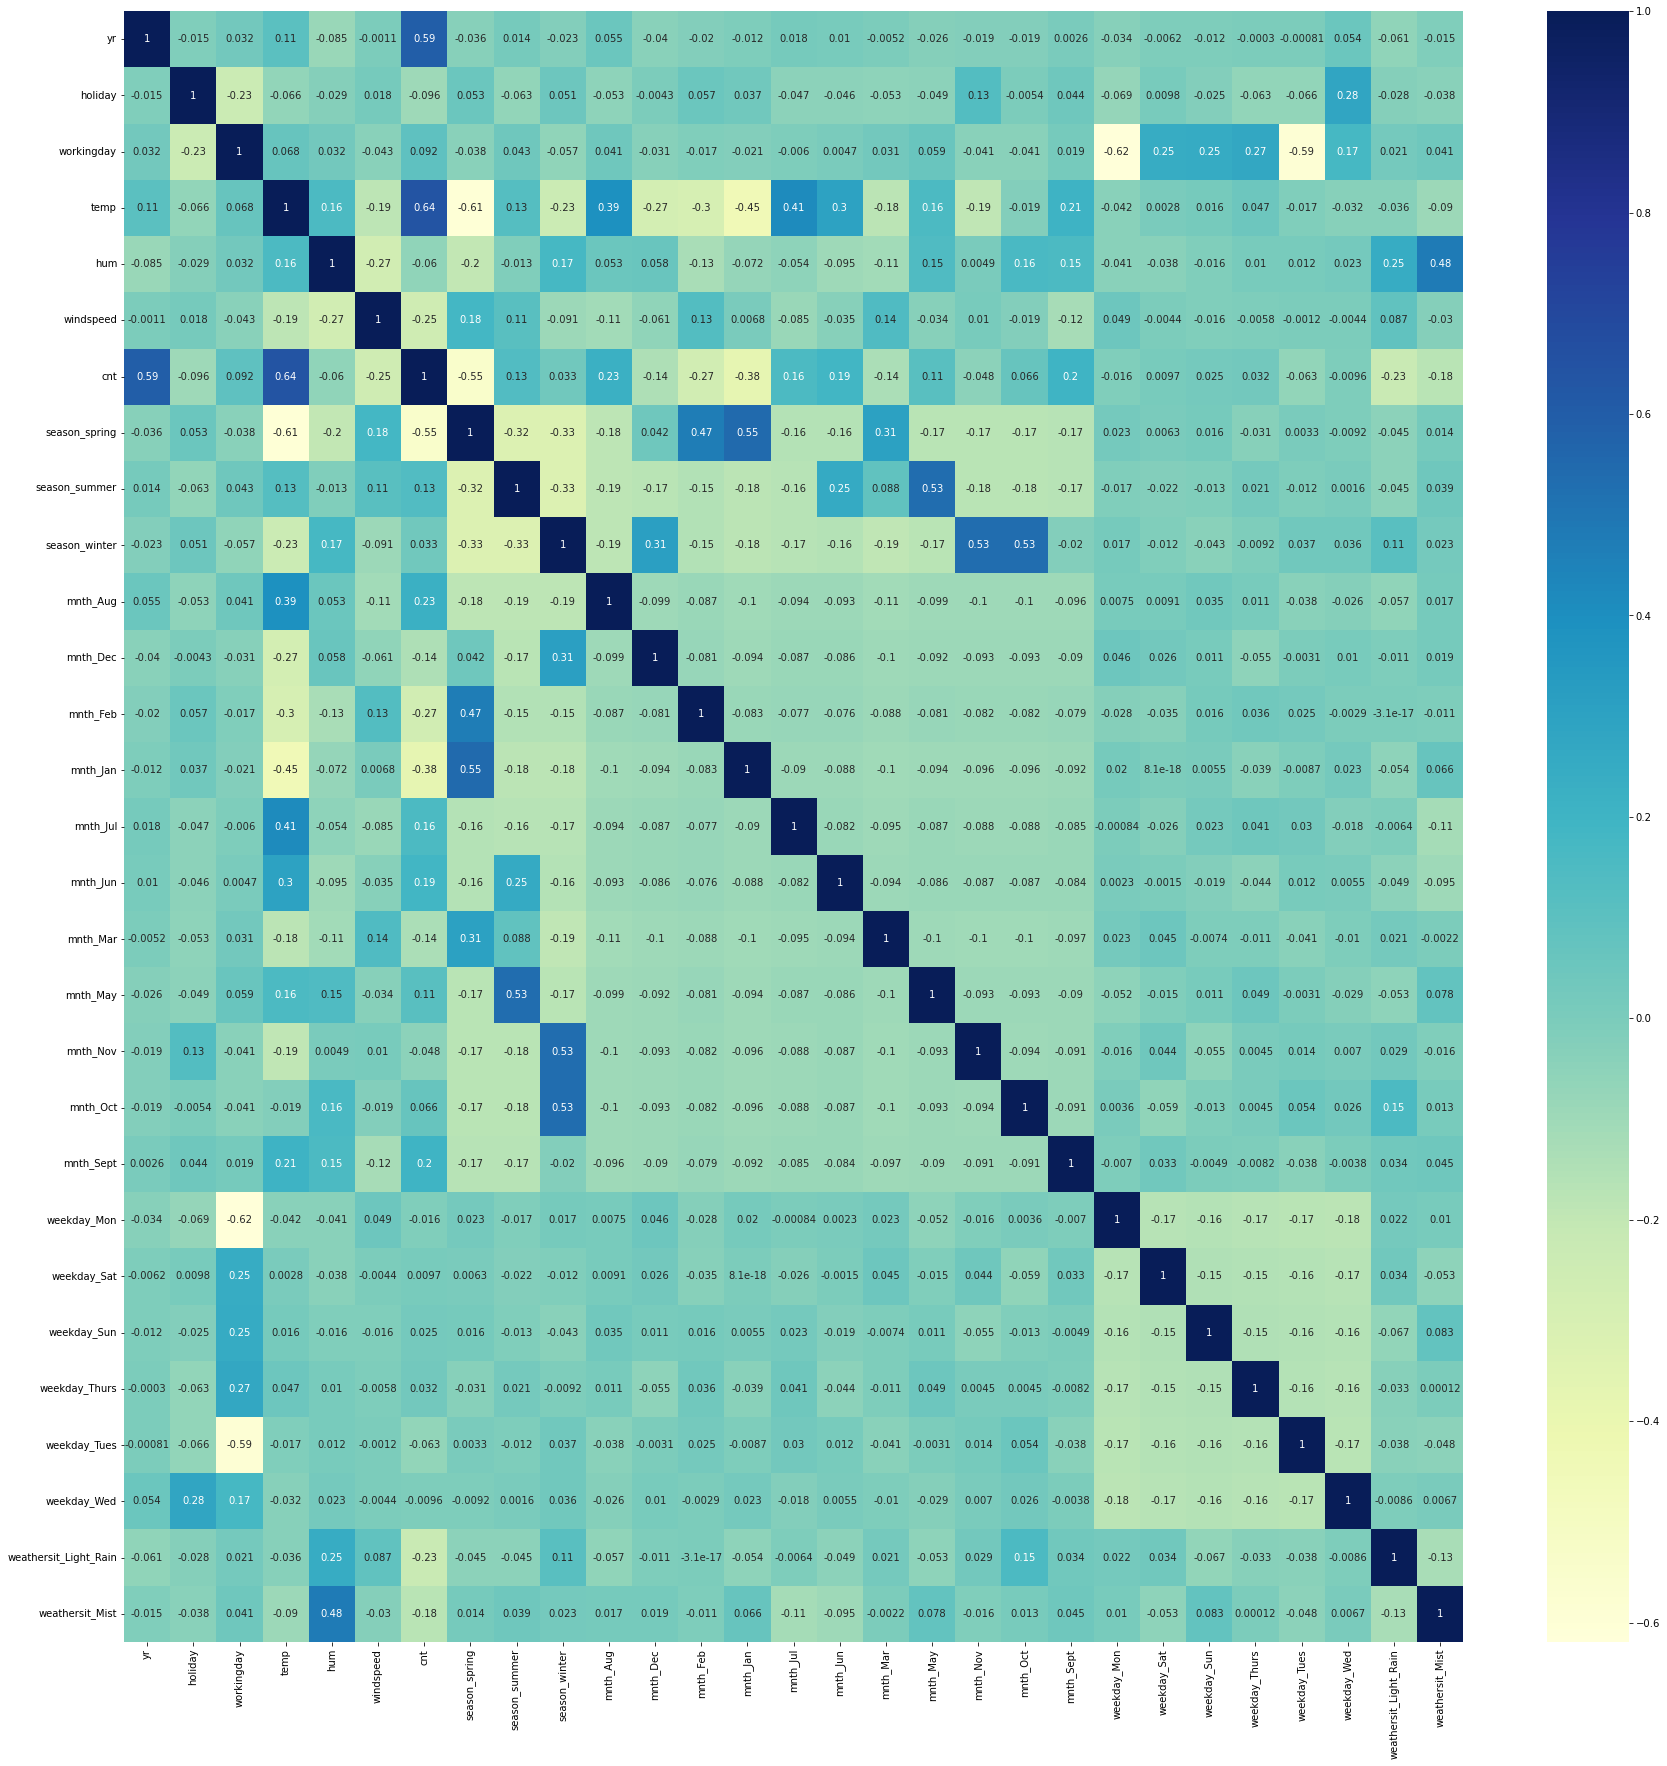

In [52]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most, after 'casual' and 'registered'. Let's see a pairplot for `temp` vs `cnt`.

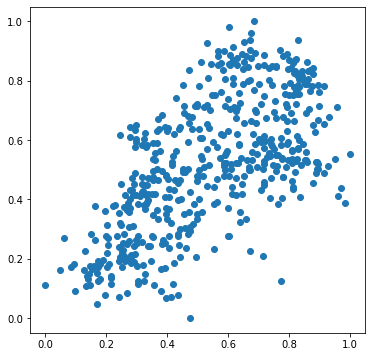

In [53]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### Dividing into X and Y sets for the model building

In [54]:
y_train = df_train.pop('cnt')
X_train = df_train 

In [55]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [56]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     510 non-null    int64  
 1   holiday                510 non-null    int64  
 2   workingday             510 non-null    int64  
 3   temp                   510 non-null    float64
 4   hum                    510 non-null    float64
 5   windspeed              510 non-null    float64
 6   season_spring          510 non-null    uint8  
 7   season_summer          510 non-null    uint8  
 8   season_winter          510 non-null    uint8  
 9   mnth_Aug               510 non-null    uint8  
 10  mnth_Dec               510 non-null    uint8  
 11  mnth_Feb               510 non-null    uint8  
 12  mnth_Jan               510 non-null    uint8  
 13  mnth_Jul               510 non-null    uint8  
 14  mnth_Jun               510 non-null    uint8  
 15  mnth_

#### Model Building Using RFE

Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [58]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select =15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True  True  True  True  True False False False
 False  True False False False False False  True  True False False False
  True False  True  True]
[ 1  1  1  1  1  1  1  1  1  7  4  5  2  1 13 14  6  3 11  1  1 12 10  9
  1  8  1  1]


In [59]:
# Select columns
col = X_train.columns[rfe1.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sept', 'weekday_Mon', 'weekday_Tues', 'weathersit_Light_Rain',
       'weathersit_Mist'],
      dtype='object')

#### Model Building and Evaluation 

Let's now check the summary of this model using `statsmodels`.

In [60]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sept,weekday_Mon,weekday_Tues,weathersit_Light_Rain,weathersit_Mist
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,1


In [61]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.13e-191
Time:                        15:29:14   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

But let's check for the multicollinearity among these variables.

In [62]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
a=X_train_rfe1.drop('const',axis=1)

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.69
11,weekday_Mon,12.20
12,weekday_Tues,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.61
4,hum,1.91
14,weathersit_Mist,1.57


From the model summary above, 'holiday'  variables has p-value > 0.05 and from the p-value perspective, hence, it is insignificant. Let's drop this variable.

In [65]:
# Let's drop the 'holiday' column
X_train_rfe1.drop("holiday",axis=1,inplace=True)
X_train_rfe1

,const,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sept,weekday_Mon,weekday_Tues,weathersit_Light_Rain,weathersit_Mist
653,1.0,1,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,1,0.824514,0.605840,0.355596,0,1,0,0,0,0,0,0,1
578,1.0,1,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,1,0,0,1


In [66]:
# Fitting the model with remaining variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.13e-191
Time:                        15:29:14   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

In [67]:
b=X_train_rfe1.drop('const',axis=1)

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
10,weekday_Mon,4.91
4,windspeed,4.90
5,season_spring,4.80
11,weekday_Tues,4.76
7,season_winter,3.71
6,season_summer,3.03
13,weathersit_Mist,2.31


From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.

So let's try removing 'hum' first having the maximum VIF and then check for it again. Dropping this variable may result in a change in other VIFs which are high.

In [69]:
# Let's drop the 'hum' column
X_train_rfe1.drop("hum",axis=1,inplace=True)
X_train_rfe1

,const,yr,workingday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sept,weekday_Mon,weekday_Tues,weathersit_Light_Rain,weathersit_Mist
653,1.0,1,1,0.509887,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,1,0.815169,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,1,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,1,0.824514,0.355596,0,1,0,0,0,0,0,0,1
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,1,0,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1,0,0,1


In [70]:
# Fitting the model with remaining variables
lm3 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          5.73e-189
Time:                        15:29:15   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.10

In [71]:
c=X_train_rfe1.drop('const',axis=1)

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
9,weekday_Mon,4.45
10,weekday_Tues,4.21
4,season_spring,3.82
6,season_winter,2.80
5,season_summer,2.75
0,yr,2.07
7,mnth_Jul,1.60


In [73]:
# Let's drop the 'workingday' column
X_train_rfe1.drop("workingday",axis=1,inplace=True)
X_train_rfe1

,const,yr,temp,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sept,weekday_Mon,weekday_Tues,weathersit_Light_Rain,weathersit_Mist
653,1.0,1,0.509887,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0.815169,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0.442393,0.255342,1,0,0,0,0,1,0,0,1
728,1.0,1,0.245101,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0.395666,0.188475,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,1,0,0,0,0,0,0,1
578,1.0,1,0.863973,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0
350,1.0,0,0.248216,0.431816,0,0,1,0,0,1,0,0,1


In [74]:
# Fitting the model with remaining variables
lm4 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.01e-186
Time:                        15:29:15   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [75]:
d=X_train_rfe1.drop('const',axis=1)

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = d.columns
vif['VIF'] = [variance_inflation_factor(d.values, i) for i in range(d.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.62
4,season_summer,2.23
3,season_spring,2.11
0,yr,2.07
5,season_winter,1.82
6,mnth_Jul,1.59
11,weathersit_Mist,1.55
7,mnth_Sept,1.33
8,weekday_Mon,1.22


In [77]:
#weekday_Mon has p-value > 0.05, so lets' drop it
# Let's drop the 'weekday_Mon' column
X_train_rfe1.drop("weekday_Mon",axis=1,inplace=True)
X_train_rfe1

,const,yr,temp,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sept,weekday_Tues,weathersit_Light_Rain,weathersit_Mist
653,1.0,1,0.509887,0.300794,0,0,1,0,0,0,0,0
576,1.0,1,0.815169,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0.442393,0.255342,1,0,0,0,0,0,0,1
728,1.0,1,0.245101,0.663106,1,0,0,0,0,1,0,0
482,1.0,1,0.395666,0.188475,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,1,0,0,0,0,0,1
578,1.0,1,0.863973,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0,0,0,0,0,0
350,1.0,0,0.248216,0.431816,0,0,1,0,0,0,0,1


In [78]:
# Fitting the model with remaining variables
lm5 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.65e-187
Time:                        15:29:15   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [79]:
e=X_train_rfe1.drop('const',axis=1)

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = e.columns
vif['VIF'] = [variance_inflation_factor(e.values, i) for i in range(e.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.13
2,windspeed,4.60
4,season_summer,2.22
3,season_spring,2.09
0,yr,2.07
5,season_winter,1.80
6,mnth_Jul,1.59
10,weathersit_Mist,1.55
7,mnth_Sept,1.33
8,weekday_Tues,1.17


All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared` value is `83.2%` using **11 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [82]:
y_train_cnt = lm5.predict(X_train_rfe1)

Text(0.5, 0, 'Errors')

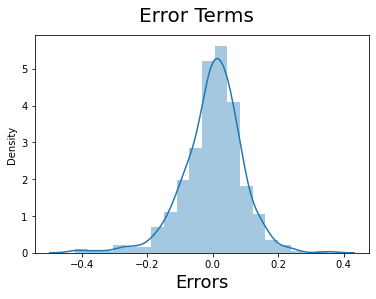

In [83]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)                         

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

Text(0, 0.5, 'Residual')

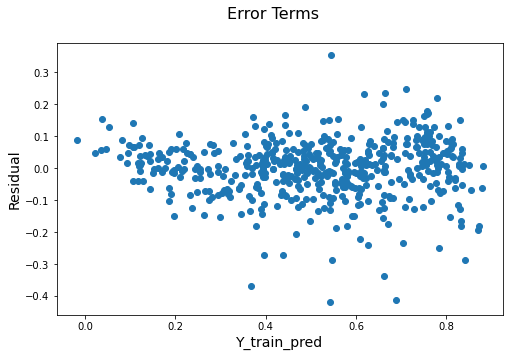

In [84]:
# Error terms train set
res = y_train - y_train_cnt
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train_cnt,res)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_train_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)   

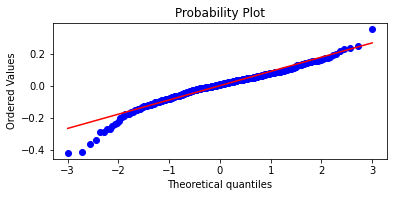

In [86]:
residual = y_train - y_train_cnt

fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [87]:
X_train_rfe1

,const,yr,temp,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sept,weekday_Tues,weathersit_Light_Rain,weathersit_Mist
653,1.0,1,0.509887,0.300794,0,0,1,0,0,0,0,0
576,1.0,1,0.815169,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0.442393,0.255342,1,0,0,0,0,0,0,1
728,1.0,1,0.245101,0.663106,1,0,0,0,0,1,0,0
482,1.0,1,0.395666,0.188475,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,1,0,0,0,0,0,1
578,1.0,1,0.863973,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0,0,0,0,0,0
350,1.0,0,0.248216,0.431816,0,0,1,0,0,0,0,1


In [88]:
# let's recall the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'cnt']

In [89]:
df_test[var] = scaler.transform(df_test[var])

In [90]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test

In [91]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [96]:
# Let's check the list 'col2' which had the final list of variables selected in modelling exercise
col2=e.columns
col2

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Jul', 'mnth_Sept', 'weekday_Tues',
       'weathersit_Light_Rain', 'weathersit_Mist'],
      dtype='object')

In [97]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe1 = X_test[col2]

In [98]:
# Add a constant to the test set created
X_test_rfe1 = sm.add_constant(X_test_rfe1)
X_test_rfe1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   yr                     219 non-null    int64  
 2   temp                   219 non-null    float64
 3   windspeed              219 non-null    float64
 4   season_spring          219 non-null    uint8  
 5   season_summer          219 non-null    uint8  
 6   season_winter          219 non-null    uint8  
 7   mnth_Jul               219 non-null    uint8  
 8   mnth_Sept              219 non-null    uint8  
 9   weekday_Tues           219 non-null    uint8  
 10  weathersit_Light_Rain  219 non-null    uint8  
 11  weathersit_Mist        219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(8)
memory usage: 10.3 KB


In [99]:
# Making predictions
y_pred = lm5.predict(X_test_rfe1)

Text(0, 0.5, 'y_pred')

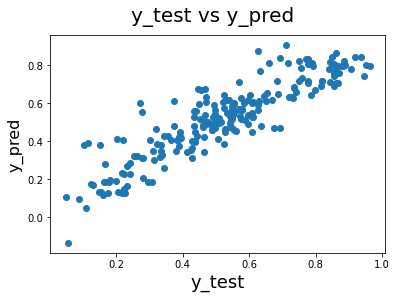

In [100]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [101]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.805407680173852

Thus, for the model with 13 variables, the r-squared on training and test data is about 83.7% and 80.54% respectively. The adjusted r-squared on the train set is about is about 83.3%.

#### Checking the correlations between the final predictor variables

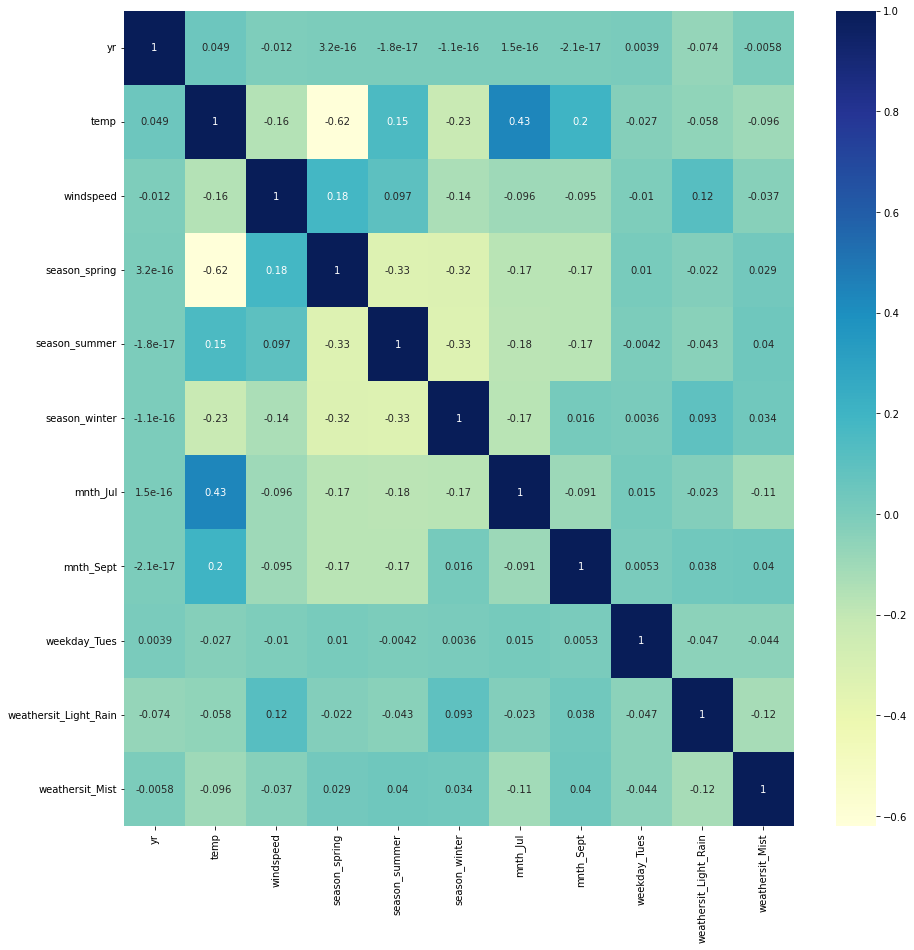

In [102]:
# Figure size
plt.figure(figsize=(15,15))


# Heatmap
sns.heatmap(df[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

This is the simplest model that we could build. The final predictors seem to have fairly low correlations.